In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv
from scipy.interpolate import CubicSpline
#from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib as mpl
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (17, 5)
mpl.rcParams['axes.grid'] = False
sns.set_style("whitegrid")

from datetime import datetime
from matplotlib.dates import date2num, DayLocator, DateFormatter

In [2]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))
    plt.savefig('{}.eps'.format(filename))

In [3]:
import datetime
import matplotlib.dates as mdates

today = '11/8/22' 
days = pd.date_range(start='6/13/17',end=today) 
ddd = np.arange(len(days))
t = np.reshape(ddd, [-1])

print(len(t))

# Generate some random date-time data
numdays1 = len(t)
base1 = datetime.date.fromisoformat('2017-06-13')
date_list1 = [base1 + datetime.timedelta(days=x) for x in range(0, numdays1)]

1975


In [4]:
# Data Loader Parameters
BATCH_SIZE = 256
BUFFER_SIZE = 1000
TRAIN_SPLIT = 1900

# LSTM Parameters
EVALUATION_INTERVAL = 200
EPOCHS = 4
PATIENCE = 5

# Reproducibility
SEED = 13
tf.random.set_seed(SEED)

In [5]:
data = pd.read_csv('BTC-USD-daily.csv', date_parser = True)
# data.tail()

In [6]:
data = data.drop(['Date', 'Adj Close', 'Volume'], axis = 1)
data

,Open,High,Low,Close
0,465.864014,468.174011,452.421997,457.334015
1,456.859985,456.859985,413.104004,424.440002
2,424.102997,427.834991,384.532013,394.795990
3,394.673004,423.295990,389.882996,408.903992
4,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
2970,20208.769531,21209.560547,20188.019531,21147.230469
2971,21144.832031,21446.886719,21097.634766,21282.691406
2972,21285.056641,21345.376953,20920.191406,20926.486328
2973,20924.621094,21053.246094,20489.972656,20602.816406


In [7]:
data = data.to_numpy()
data

array([[  465.864014,   468.174011,   452.421997,   457.334015],
       [  456.859985,   456.859985,   413.104004,   424.440002],
       [  424.102997,   427.834991,   384.532013,   394.79599 ],
       ...,
       [21285.056641, 21345.376953, 20920.191406, 20926.486328],
       [20924.621094, 21053.246094, 20489.972656, 20602.816406],
       [20620.449219, 20662.337891, 18754.533203, 18882.679688]])

(1975,)


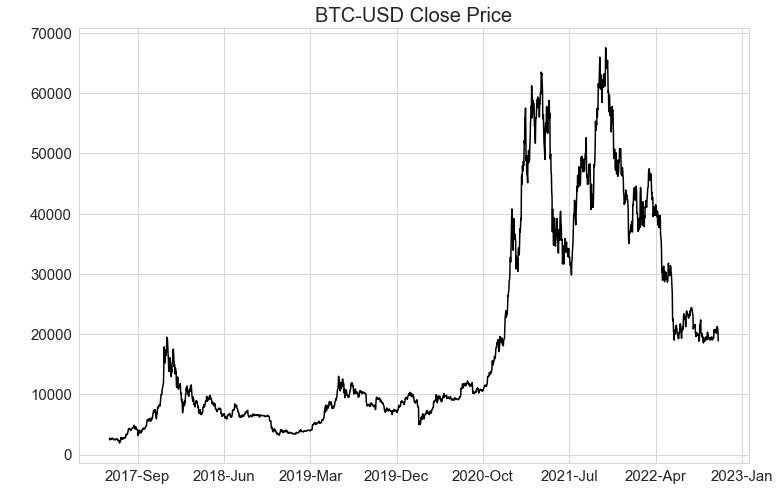

In [8]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12, 8))

Data=data[1000:,:]
uni_data = Data[:,3]
print(uni_data.shape)

ax1.plot(date_list1,uni_data,'k')
ax1.set_title('BTC-USD Close Price',fontsize = 20)
ax1.xaxis.set_major_locator(DayLocator())
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=40))
ax1.set_ylabel(' ',fontsize = 20)
ax1.tick_params(labelsize=15)

savefig('./figures/BTC-USD')

In [9]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
        
    return np.array(data), np.array(labels)

In [10]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [11]:
# normalize with mean and std of train set

uni_data = (uni_data-uni_train_mean)/uni_train_std

In [12]:
univariate_past_history = 60
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(dataset=uni_data,
                                           start_index=0,
                                           end_index=TRAIN_SPLIT,
                                           history_size=univariate_past_history,
                                           target_size=univariate_future_target)
x_val_uni, y_val_uni = univariate_data(dataset=uni_data,
                                       start_index=TRAIN_SPLIT,
                                       end_index=None,
                                       history_size=univariate_past_history,
                                       target_size=univariate_future_target)

In [13]:
# print ('Single window of past history. Shape: {}'.format(x_train_uni[-1].shape))
# print (x_train_uni[-1])
# print ('\n Target close price to predict. Shape: {}'.format(y_train_uni[-1].shape))
# print (y_train_uni[-1])

In [14]:
import datetime
import matplotlib.dates as mdates

#
Days2 = pd.date_range(start='9/10/22',end='11/8/22') 
dd2 = np.arange(len(Days2))
tt2 = np.reshape(dd2, [-1])

print(len(tt2))

numdays22 = len(tt2)
base22 = datetime.date.fromisoformat('2022-09-10')
date_list22 = [base22 + datetime.timedelta(days=x) for x in range(0, numdays22)]

#
Days3 = pd.date_range(start='10/25/22',end='11/8/22') 
dd3 = np.arange(len(Days3))
tt3 = np.reshape(dd3, [-1])

print(len(tt3))

numdays23 = len(tt3)
base23 = datetime.date.fromisoformat('2022-10-25')
date_list23 = [base23 + datetime.timedelta(days=x) for x in range(0, numdays23)]

#
Days4 = pd.date_range(start='9/10/22',end='11/8/22') 
dd4 = np.arange(len(Days4))
tt4 = np.reshape(dd4, [-1])

print(len(tt4))

numdays24 = len(tt4)
base24 = datetime.date.fromisoformat('2022-09-10')
date_list24 = [base24 + datetime.timedelta(days=x) for x in range(0, numdays24)]



60
15
60


In [15]:
# RNN

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [16]:
# LSTM 1

simple_lstm_model_1 = Sequential([
    LSTM(100, activation = 'relu', input_shape=x_train_uni.shape[-2:]),
    Dense(1)
])
simple_lstm_model_1.compile(optimizer='adam', loss='mae')

In [17]:
# LSTM 2

simple_lstm_model_2 = Sequential()
simple_lstm_model_2.add(LSTM(100, activation = 'relu', return_sequences = True, input_shape = x_train_uni.shape[-2:]))
simple_lstm_model_2.add(Dropout(0.1))
simple_lstm_model_2.add(LSTM(100, activation = 'relu'))
#simple_lstm_model_2.add(Dropout(0.3))
simple_lstm_model_2.add(Dense(1))

simple_lstm_model_2.compile(optimizer='adam', loss='mae')

In [18]:
# LSTM 3

simple_lstm_model_3 = Sequential()
simple_lstm_model_3.add(LSTM(100, activation = 'relu', return_sequences = True, input_shape = x_train_uni.shape[-2:]))
#simple_lstm_model_3.add(Dropout(0.2))
simple_lstm_model_3.add(LSTM(100, activation = 'relu', return_sequences = True))
simple_lstm_model_3.add(Dropout(0.1))
simple_lstm_model_3.add(LSTM(100, activation = 'relu'))
#simple_lstm_model_3.add(Dropout(0.3))
simple_lstm_model_3.add(Dense(1))


simple_lstm_model_3.compile(optimizer='adam', loss='mae')

In [19]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model_1.predict(x).shape)

1/1 [==============================] - 0s 365ms/step
(15, 1)


In [20]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model_2.predict(x).shape)

1/1 [==============================] - 1s 533ms/step
(15, 1)


In [21]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model_3.predict(x).shape)

1/1 [==============================] - 1s 756ms/step
(15, 1)


In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True)
simple_lstm_model_1.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate,
                      callbacks=[early_stopping],
                      validation_steps=50)

Epoch 1/4
200/200 [==============================] - 21s 95ms/step - loss: 0.1096 - val_loss: 0.0309
Epoch 2/4
200/200 [==============================] - 17s 87ms/step - loss: 0.0505 - val_loss: 0.0304
Epoch 3/4
200/200 [==============================] - 18s 88ms/step - loss: 0.0421 - val_loss: 0.0363
Epoch 4/4
200/200 [==============================] - 18s 88ms/step - loss: 0.0388 - val_loss: 0.0281


In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True)
simple_lstm_model_2.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate,
                      callbacks=[early_stopping],
                      validation_steps=50)

Epoch 1/4
200/200 [==============================] - 51s 235ms/step - loss: 0.1157 - val_loss: 0.0336
Epoch 2/4
200/200 [==============================] - 43s 215ms/step - loss: 0.0582 - val_loss: 0.0338
Epoch 3/4
200/200 [==============================] - 43s 215ms/step - loss: 0.0525 - val_loss: 0.0307
Epoch 4/4
200/200 [==============================] - 43s 213ms/step - loss: 0.0478 - val_loss: 0.0294


In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True)
simple_lstm_model_3.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate,
                      callbacks=[early_stopping],
                      validation_steps=50)

Epoch 1/4
200/200 [==============================] - 81s 376ms/step - loss: 0.1347 - val_loss: 0.0314
Epoch 2/4
200/200 [==============================] - 79s 395ms/step - loss: 0.0712 - val_loss: 0.0322
Epoch 3/4
200/200 [==============================] - 78s 392ms/step - loss: 0.0592 - val_loss: 0.0416
Epoch 4/4
200/200 [==============================] - 67s 333ms/step - loss: 0.0561 - val_loss: 0.0380


1/1 [==============================] - 0s 27ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


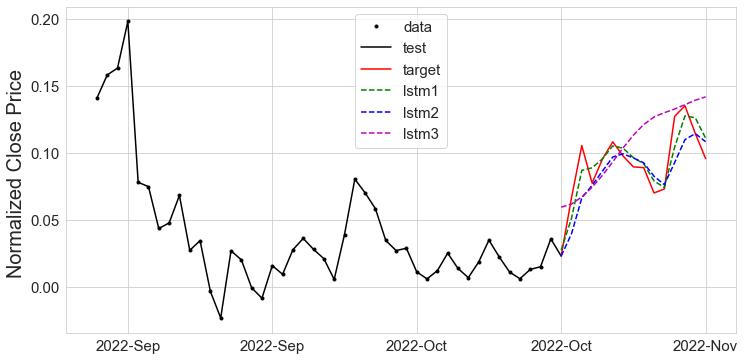

In [27]:
# for x, y in val_univariate.take(1):

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12, 6))
ax1.xaxis.set_major_locator(DayLocator())
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax1.set_ylabel('Normalized Close Price ',fontsize = 20)
ax1.tick_params(labelsize=15)
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax1.plot(date_list24[0:45],uni_data[1914:1959],'k.') # data
ax1.plot(date_list22[:46],x[-1,:46,:].numpy(),'k-') # test
ax1.plot(date_list24[45:],x[-1,45:,:].numpy(),'r-') # target
ax1.plot(date_list23,simple_lstm_model_1.predict(x),'g--') # prediction
ax1.plot(date_list23,simple_lstm_model_2.predict(x),'b--') # prediction
ax1.plot(date_list23,simple_lstm_model_3.predict(x),'m--') # prediction
#plt.plot(date_list24[46:],y[:-1].numpy(),'b--') # target
    
plt.legend(('data','test','target','lstm1','lstm2','lstm3'),loc='best',fontsize = 15)
    
savefig('./figures/lstm3layersdoubleunitswithdropoutBEST')
    